# Weisfeiler-Lehman test

The Weisfeiler-Lehman (WL) algorithm $^1$ is is a classical isomorphism test based on color refinement. 
It can efficiently identify isomorphic graphs, but there are simple example where this approach fails.

We highlight here such an example and show how the use of a neutral atom quantum computer can circumvent this obstacle.






###### $^1$ B Weisfeiler and A Leman, “The reduction of a graph to canonical form and the algebra which appears therein”, Nauchno-Technicheskaya Informatsia,  (1968).

### The graphs

Let us first define a family of pairs of graphs that are not isomorphic, but cannot be distinguihed by the WL test.

![GRAPHS](graphs.png)

For each pair of graphs, the number of nodes, number of edges as well as the same distribution of node degrees. This makes them indistinguishable via the WL test.
Here we will focus on the second (red) pair.

We will study the dynamics of neutral atoms placed on the nodes of a graph, and interacting with each other if (and only if) they are connected by an edge of the graph.

As we will see, these two graphs lead to different dynamics (as opposed to the classical case), and can then be easily distinguished.


## Intallation

We will use `pulser` to implement this tutorial. It can be easily installed with `pip` by running

`pip install pulser`

or alternatively can directly be found on Github at https://github.com/pasqal-io/Pulser.

## Creation of the Register

We will start by placing the atoms in the device, with a nearest-neighbor distance of 5 μm.

In [112]:
# Let us import numpy first
import numpy as np

# Here are the coordinates of the nodes of each graph

pentagons_coordinates = [
    [0.26286555605956674, -0.8090169943749475],
    [0.8506508083520399, 0.0],
    [0.2628655560595669, 0.8090169943749473],
    [-0.6881909602355867, 0.5],
    [-0.6881909602355868, -0.5],
    [-1.6392474765307403, -0.8090169943749475],
    [-2.2270327288232132, 0.0],
    [-1.6392474765307403, 0.8090169943749473]
]

squares_coordinates = [
    [0.7071067811865476, 0.0],
    [1.7071067811865475, -0.0],
    [0, 0.7071067811865476],
    [2.414213562373095, -0.7071067811865476],
    [-0.7071067811865476, 0.0],
    [3.121320343559643, 0.0],
    [0, -0.7071067811865476],
    [2.414213562373095, 0.7071067811865476]
]


from pulser import Register

a = 5 # nearest-neighbor distance

pentagons_register = Register.from_coordinates(np.array(pentagons_coordinates) * a)
squares_register = Register.from_coordinates(np.array(squares_coordinates) * a)

One can now draw each set of atoms, with the interaction graph.

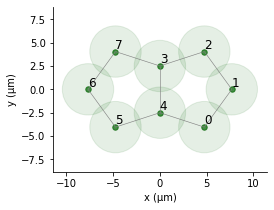

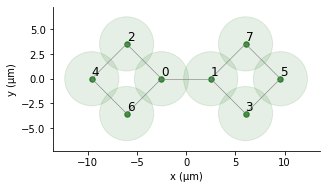

In [139]:
pentagons_register.draw(draw_graph=True, blockade_radius=a*1.1, draw_half_radius=True)
squares_register.draw(draw_graph=True, blockade_radius=a*1.1, draw_half_radius=True)


## Creation of the pulse

In the current setting, the atoms interact via an Ising interaction
$ H_I = \sum_{i>j}V_{ij} \hat n_i \hat n_j$
with $V_{ij}\propto r_{ij}^{-6}$.

We will consider a simple case, with no detuning ($\delta=0$), and a constant amplitude $\Omega$, so that the total **constant** hamiltonian of the system is

$$ 
H = \sum_{i>j}V_{ij} \hat n_i \hat n_j - \frac{\hbar \Omega}{2}\sum_i \hat \sigma_i 
$$.

We will now create a pulse of duration T = 2.5 μs and amplitude $\Omega = 2\pi$ rad/µs, and prepare a *sequence* to be sent to a quantum device.

In [115]:
duration = 2500 # 2500 ns = 1.5 μs
Omega = 2*np.pi # rad/µs
delta = 0

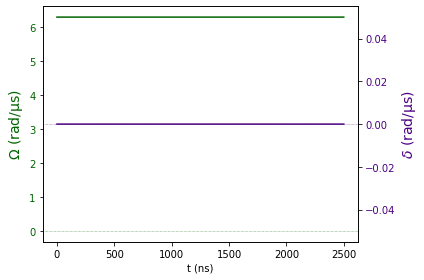

In [116]:
from pulser import Pulse
from pulser.waveforms import ConstantWaveform

pulse = Pulse.ConstantPulse(duration, amplitude=Omega, detuning=delta, phase=0)

# Let's draw this pulse
pulse.draw()

## Set the quantum device

We now need to prepare a sequence containing the informations about the register and the pulse, before we can send it to the QPU (or the emulator).
We first need to import the device(s)

In [117]:
from pulser.devices import Chadoq2, MockDevice

One can then check the specs of the devices

In [118]:
# Fictitious device (for advance testing)
MockDevice.print_specs()

-------------------------
MockDevice Specifications
-------------------------

Register requirements:
 - Dimensions: 3D
 - Rydberg level: 70
 - Maximum number of atoms: 2000
 - Maximum distance from origin: 1000 μm
 - Minimum distance between neighbouring atoms: 1 μm

Channels:
 - 'rydberg_global': Rydberg.Global(Max Absolute Detuning: 1000 rad/µs, Max Amplitude: 200 rad/µs, Phase Jump Time: 0 ns, Basis: 'ground-rydberg')
 - 'rydberg_local': Rydberg.Local(Max Absolute Detuning: 1000 rad/µs, Max Amplitude: 200 rad/µs, Phase Jump Time: 0 ns, Minimum retarget time: 0 ns, Fixed retarget time: 0 ns, Max targets: 2000, Basis: 'ground-rydberg')
 - 'raman_global': Raman.Global(Max Absolute Detuning: 1000 rad/µs, Max Amplitude: 200 rad/µs, Phase Jump Time: 0 ns, Basis: 'digital')
 - 'raman_local': Raman.Local(Max Absolute Detuning: 1000 rad/µs, Max Amplitude: 200 rad/µs, Phase Jump Time: 0 ns, Minimum retarget time: 0 ns, Fixed retarget time: 0 ns, Max targets: 2000, Basis: 'digital')
 - 'mw_gl

In [119]:
# Real device (let's chose this one)
Chadoq2.print_specs()
device = Chadoq2

----------------------
Chadoq2 Specifications
----------------------

Register requirements:
 - Dimensions: 2D
 - Rydberg level: 70
 - Maximum number of atoms: 100
 - Maximum distance from origin: 50 μm
 - Minimum distance between neighbouring atoms: 4 μm

Channels:
 - 'rydberg_global': Rydberg.Global(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 15.707963267948966 rad/µs, Phase Jump Time: 0 ns, Basis: 'ground-rydberg')
 - 'rydberg_local': Rydberg.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Phase Jump Time: 0 ns, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Basis: 'ground-rydberg')
 - 'raman_local': Raman.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Phase Jump Time: 0 ns, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Basis: 'digital')


## Sequence

To create a `Sequence`, one has to provide it with the `Register` instance and the device in which the sequence will be executed. The chosen device will dicate whether the register is valid or not.

### Initializing the Sequence

In [120]:
from pulser import Sequence

pentagons_sequence = Sequence(pentagons_register, device)
squares_sequence = Sequence(squares_register, device)


### Declaring the channels that will be used

Inspecting what channels are available on this device:

In [121]:
pentagons_sequence.available_channels

{'rydberg_global': Rydberg.Global(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 15.707963267948966 rad/µs, Phase Jump Time: 0 ns, Basis: 'ground-rydberg'),
 'rydberg_local': Rydberg.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Phase Jump Time: 0 ns, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Basis: 'ground-rydberg'),
 'raman_local': Raman.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Phase Jump Time: 0 ns, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Basis: 'digital')}

We’re going to choose the `rydberg_global` channel, and give it the name `global`

In [122]:
pentagons_sequence.declare_channel('global','rydberg_global')
squares_sequence.declare_channel('global','rydberg_global')

And then add the pulse we just created to the channel :

In [123]:
pentagons_sequence.add(pulse, 'global')
squares_sequence.add(pulse, 'global')

### Measurement
To finish a sequence, we measure it. A measurement signals the end of a sequence, so after it no more changes are possible. We can measure a sequence by calling:

In [124]:
pentagons_sequence.measure(basis="ground-rydberg")
squares_sequence.measure(basis="ground-rydberg")

Let's see what the sequence looks like

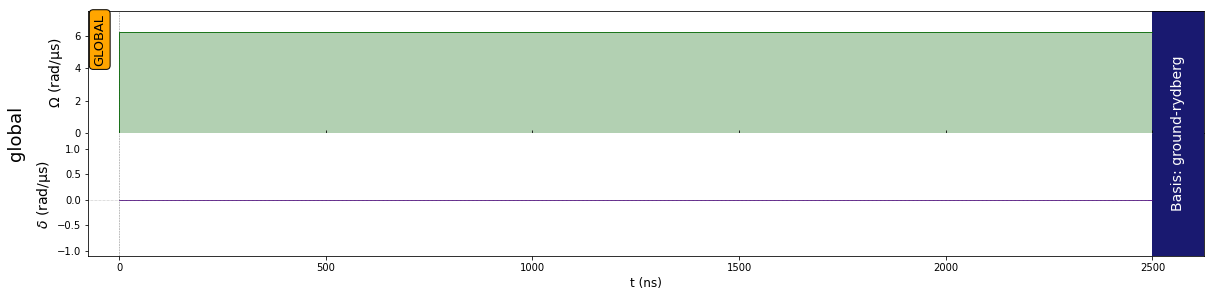

In [125]:
pentagons_sequence.draw()

The sequences are now ready to be sent to the QPU. Here, we will send it to the emulator instead. Let us load it first

In [126]:
from pulser_simulation import Simulation

We can then create the simulation for both graphs, and run them

In [127]:
squares_simulation = Simulation(squares_sequence)
pentagons_simulation = Simulation(pentagons_sequence)

squares_times = squares_simulation.sampling_times
pentagons_times = pentagons_simulation.sampling_times

squares_results = squares_simulation.run()
pentagons_results = pentagons_simulation.run()

In a proper QPU, the system is measured at the end of the sequence, and the end result is a set of measurements, obtained after many (say N_samples=1000) repetition of the same sequence.
This can be obtained from the simulation results in the following way

In [128]:
N_samples = 1000

In [129]:
squares_samples = squares_results.sample_final_state(N_samples=N_samples)
print(squares_samples)

Counter({'00000000': 576, '00000100': 73, '00001000': 60, '00100001': 47, '00010010': 46, '00100000': 29, '10000100': 26, '00000001': 22, '00000011': 22, '00000010': 20, '00010000': 19, '01001000': 19, '00110000': 18, '00001100': 5, '01000100': 5, '10000000': 5, '01000000': 2, '10001000': 2, '00100010': 1, '00100100': 1, '01000010': 1, '10010000': 1})


In [130]:
pentagons_samples = pentagons_results.sample_final_state(N_samples=N_samples)
print(pentagons_samples)

Counter({'10000100': 166, '00100100': 144, '00100001': 129, '10000001': 124, '00100010': 63, '10000010': 52, '00001000': 45, '01000001': 45, '01000100': 45, '01000010': 36, '00010000': 27, '01000000': 26, '00000010': 21, '00000000': 14, '01001000': 10, '01000101': 6, '10100001': 6, '00101001': 5, '00001010': 4, '10000101': 4, '10100010': 4, '00010010': 3, '10010100': 3, '00101010': 2, '01001010': 2, '01010010': 2, '01010100': 2, '10100100': 2, '00000001': 1, '00000100': 1, '00000101': 1, '00001001': 1, '00010100': 1, '00100101': 1, '01001001': 1, '01010000': 1})


As a simple illustration, we will only extract from these, the histogram of the number of `1`, i.e. the number of atoms that were measured in the Rydberg state

In [131]:
def histogram_from_samples(samples):
    """Extract the histogram of the number of atoms measured in the Rydberg state."""
    # number of qubits
    n_qubits = np.max([len(key) for key in samples.keys()])

    # list of number of occurrences of each number of Rydberg
    counts = np.arange(n_qubits + 1)

    for bitstring, count in samples.items():
        n = np.sum(np.array([int(b) for b in bitstring]))
        counts[n] += count

    return counts / np.sum(counts)

squares_histogram = histogram_from_samples(squares_samples)
pentagons_histogram = histogram_from_samples(pentagons_samples)

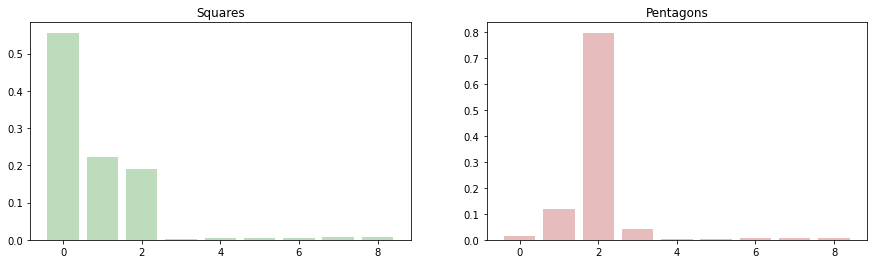

In [132]:
# Import ploting libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
axes[0].set_title('Squares')
axes[0].bar(np.arange(len(squares_histogram)), squares_histogram, color='forestgreen', alpha=.3)

axes[1].set_title('Pentagons')
axes[1].bar(np.arange(len(pentagons_histogram)), pentagons_histogram, color='firebrick', alpha=.3)

plt.show()

The Histograms are clearly distinct. This can be quantified, for example, via their Jensen-Shannon divergence (it is a number in `[0, 1]` that is 0 for identical distributions) :

In [133]:
def Entropy(proba):
    """Returns the entropy of a probability distribution."""
    return -np.sum(proba * np.log2(proba, where=proba > 0))


def JensenShannon_divergence(proba1, proba2):
    """Returns the Jensen-Shannon divergence of two probability distributions."""
    p1 = np.array(proba1) / np.sum(proba1)
    p2 = np.array(proba2) / np.sum(proba2)
    js = Entropy((p1 + p2) / 2) - (Entropy(p1) + Entropy(p2)) / 2

    return js

print(JensenShannon_divergence(squares_histogram, pentagons_histogram))


0.4107915573190579


In the real QPU, only the final state can be sample. In order to access intermediate states, one has to build the corresponding sequence, ending at the desired time.
But with the emulation, we can 'cheat' a bit and sample at any desired time (so long as it is in the `sampling_times` of the simulation).

In [134]:
# Build a list containing the samples for all accessible sampling times
squares_intermediate_samples = [ squares_results.sample_state(time, n_samples=N_samples) for time in squares_times]
pentagons_intermediate_samples = [ pentagons_results.sample_state(time, n_samples=N_samples) for time in pentagons_times]

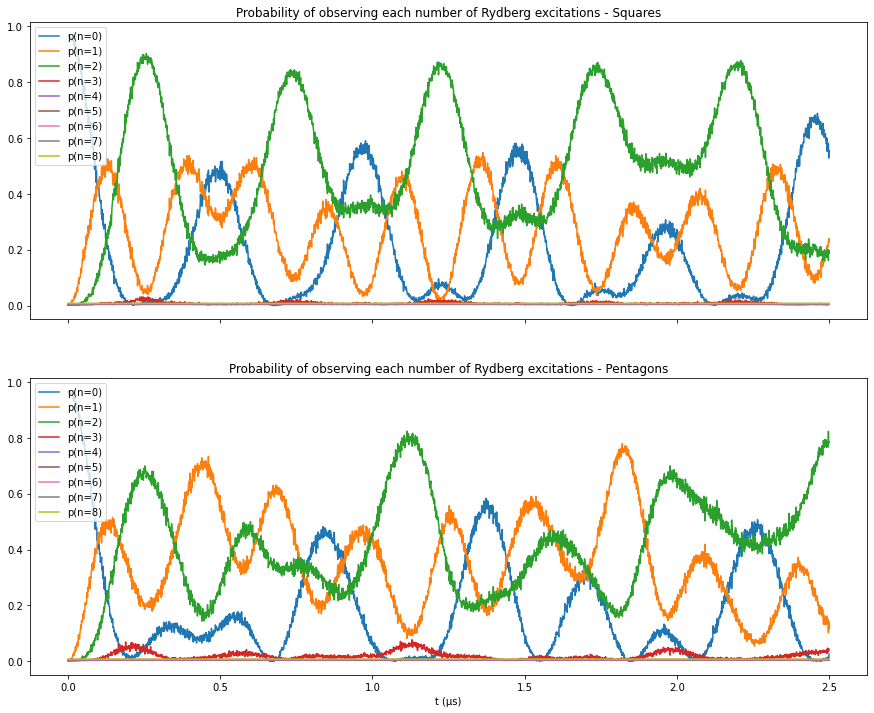

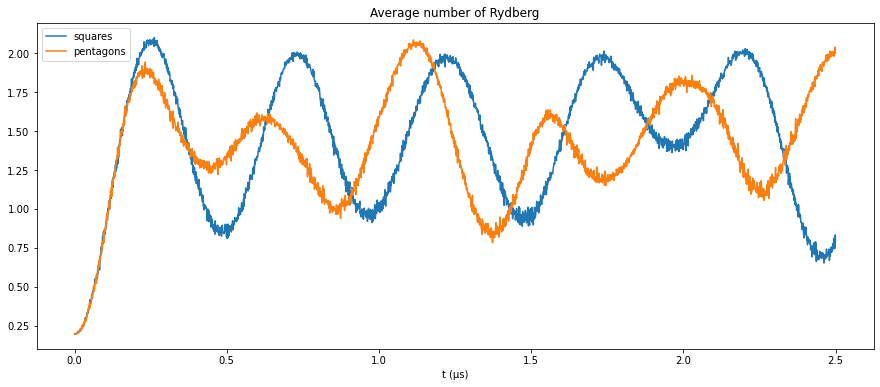

In [135]:
# Build a list containing the histograms for all accessible sampling times
squares_histograms = np.array([histogram_from_samples(samples) for samples in squares_intermediate_samples])
pentagons_histograms = np.array([histogram_from_samples(samples) for samples in pentagons_intermediate_samples])

fig, axes = plt.subplots(nrows=2, figsize=(15, 12), sharex=True)

for n, (p_sq, p_pent) in enumerate(zip(squares_histograms.T, pentagons_histograms.T)):
    axes[0].plot(squares_times, p_sq, label=f'p(n={n})')
    axes[1].plot(pentagons_times, p_pent, label=f'p(n={n})')

axes[0].set_title('Probability of observing each number of Rydberg excitations - Squares')
axes[0].legend()
axes[1].set_title('Probability of observing each number of Rydberg excitations - Pentagons')
axes[1].legend()
axes[1].set_xlabel('t (μs)')

plt.show()





fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Average number of Rydberg')
ax.set_xlabel('t (μs)')

n_qubits = len(squares_histograms[0])-1
occupations = np.arange(n_qubits+1)
square_mean = np.array([np.sum(occupations * histogram) for histogram in squares_histograms])

n_qubits = len(pentagons_histograms[0])-1
occupations = np.arange(n_qubits+1)
pentagons_mean = np.array([np.sum(occupations * histogram) for histogram in pentagons_histograms])

ax.plot(squares_times, square_mean, label=f'squares')
ax.plot(pentagons_times, pentagons_mean, label=f'pentagons')

ax.legend()

plt.show()




In [136]:
print(n_qubits)
print(pentagons_histograms[0])
n_qubits * pentagons_histograms[0]

8
[0.96525097 0.00096525 0.0019305  0.00289575 0.003861   0.00482625
 0.00579151 0.00675676 0.00772201]


array([7.72200772, 0.00772201, 0.01544402, 0.02316602, 0.03088803,
       0.03861004, 0.04633205, 0.05405405, 0.06177606])

The time dependance of the histograms is clearly different on the two graphs. Note that the visible noise comes from the finite sampling of the final state.

Let us finally look at their Jensen-Shannon divergence :

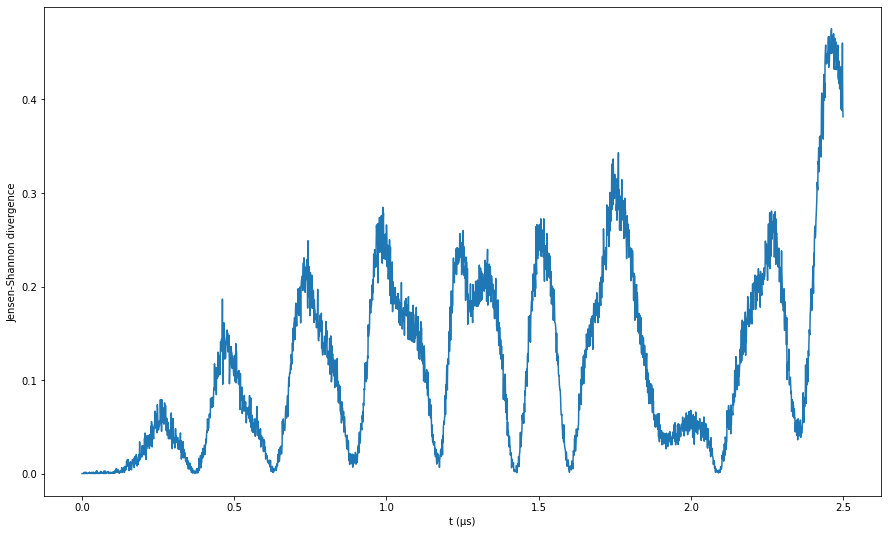

In [166]:
JS_divergences = np.array([JensenShannon_divergence(squares_histogram, pentagons_histogram) for squares_histogram, pentagons_histogram in zip(squares_histograms, pentagons_histograms)])
fig, ax = plt.subplots(figsize=(15, 9))
ax.set_ylabel('Jensen-Shannon divergence')
ax.set_xlabel('t (μs)')
ax.plot(squares_simulation.sampling_times, JS_divergences)

plt.show()

As one can see, even though there are times where the divergence approaches zero, it tends to increase as time goes and as the system explores more and more details of its structure.

It is worth noting that, for an equivalent *classical* system (or in the classical limit, for those familiar with the concept), the dynamics is expected to be exactly the same on both graphs, which makes this approach *uniquely quantum*! (the same goes for any mean-field approach, making this an intrinsic many-body effect!).